In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv',nrows=50000)


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
data.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data['acoustic_data'], data['time_to_failure'],test_size=0.2)

In [41]:
X_train.head()

9982      3
33076     9
1794     13
10184     4
3326     -8
Name: acoustic_data, dtype: int64

In [44]:
X_test.min()

-98

In [43]:
X_train.max()

104

In [8]:
y_train.head()

38953    1.459598
30501    1.461698
28763    1.461700
47942    1.457397
1170     1.469099
Name: time_to_failure, dtype: float64

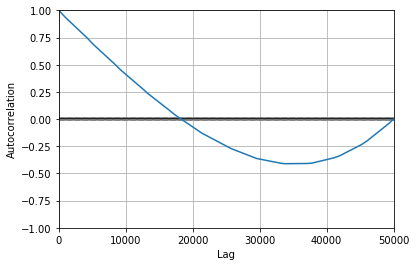

In [9]:
from pandas.plotting import autocorrelation_plot

series = pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv', nrows=50000,header=0, index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
model = ARIMA(series, order=(5,1,0))

/Users/gauravtyagi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/gauravtyagi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.time_to_failure   No. Observations:                49999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              480132.415
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 11 Feb 2019   AIC                        -960250.830
Time:                        18:01:14   BIC                        -960189.092
Sample:                             1   HQIC                       -960231.491
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.541e-07    7.3e-08     -3.480      0.001   -3.97e-07   -1.11e-07
ar.L1.D.time_to_failure    -0.0002      0.004     -0.054      0.957      -0.009       0.009


In [13]:
from pandas import DataFrame


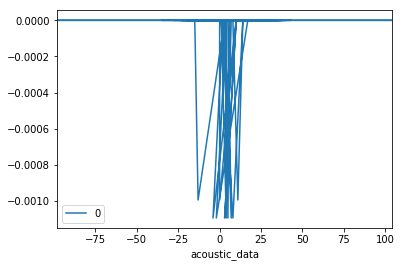

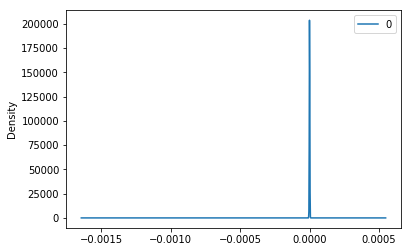

                  0
count  4.999900e+04
mean   4.021160e-11
std    1.634205e-05
min   -1.095241e-03
25%    2.532672e-07
50%    2.532672e-07
75%    2.532672e-07
max    2.532672e-07


In [14]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

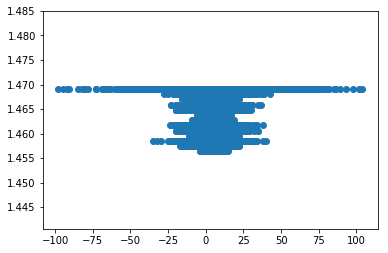

In [15]:
plt.scatter(data.acoustic_data,data.time_to_failure)

In [18]:
forecast = model_fit.forecast()[0]

In [20]:
data.acoustic_data.min()

-98

In [21]:
data.acoustic_data.max()

104

In [28]:
result=model_fit.predict(start=1,end=104)

In [30]:
result.shape

(104,)

In [34]:
X_train=X_train.map(lambda x:  x>1)

In [35]:
y_train.shape

(40000,)